# Exploratory Data Analysis

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

In [2]:
# Loading the data
df = pd.read_csv('./data/data_wrangling.csv')

In [3]:
# Checking the loaded file
pd.set_option('display.max_columns', len(df.columns))
df.head()

,log_price,price,review_scores_cleanliness,instant_bookable,availability_365,property_type,maximum_nights,availability_30,number_of_reviews_ltm,availability_60,longitude,has_availability,availability_90,neighbourhood_cleansed,review_scores_accuracy,room_type,bedrooms,reviews_per_month,latitude,review_scores_rating,review_scores_checkin,accommodates,host_is_superhost,bathrooms_text,review_scores_value,host_response_time,beds,minimum_nights
0,6.150603,469.0,10.0,False,0,14,730,0,0,0,-79.42423,True,0,71,10.0,0,5.0,0.10,43.64590,100.0,10.0,10,False,11,10.0,1,7.0,28
1,4.543295,94.0,10.0,True,365,21,365,30,0,60,-79.37673,True,90,122,10.0,2,1.0,1.19,43.64080,97.0,10.0,2,False,5,10.0,0,1.0,180
2,4.276666,72.0,10.0,True,365,36,28,30,0,60,-79.45411,True,90,15,10.0,2,1.0,1.64,43.69805,95.0,10.0,3,False,4,10.0,1,1.0,28
3,4.605170,100.0,9.0,False,283,14,365,0,2,0,-79.44010,True,8,109,9.0,0,2.0,0.86,43.63539,93.0,10.0,5,False,2,9.0,4,2.0,30
4,4.532599,93.0,10.0,False,363,24,60,28,1,58,-79.29188,True,88,128,10.0,2,2.0,0.60,43.74922,99.0,10.0,4,False,3,10.0,3,2.0,2


In [4]:
# Checking the information about the columns in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10799 entries, 0 to 10798
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   log_price                  10799 non-null  float64
 1   price                      10799 non-null  float64
 2   review_scores_cleanliness  10799 non-null  float64
 3   instant_bookable           10799 non-null  bool   
 4   availability_365           10799 non-null  int64  
 5   property_type              10799 non-null  int64  
 6   maximum_nights             10799 non-null  int64  
 7   availability_30            10799 non-null  int64  
 8   number_of_reviews_ltm      10799 non-null  int64  
 9   availability_60            10799 non-null  int64  
 10  longitude                  10799 non-null  float64
 11  has_availability           10799 non-null  bool   
 12  availability_90            10799 non-null  int64  
 13  neighbourhood_cleansed     10799 non-null  int

There are total 28 columns in the dataframe. Out of 28 columns 3 columns are bool type, 12 are float type and 13 are int type.

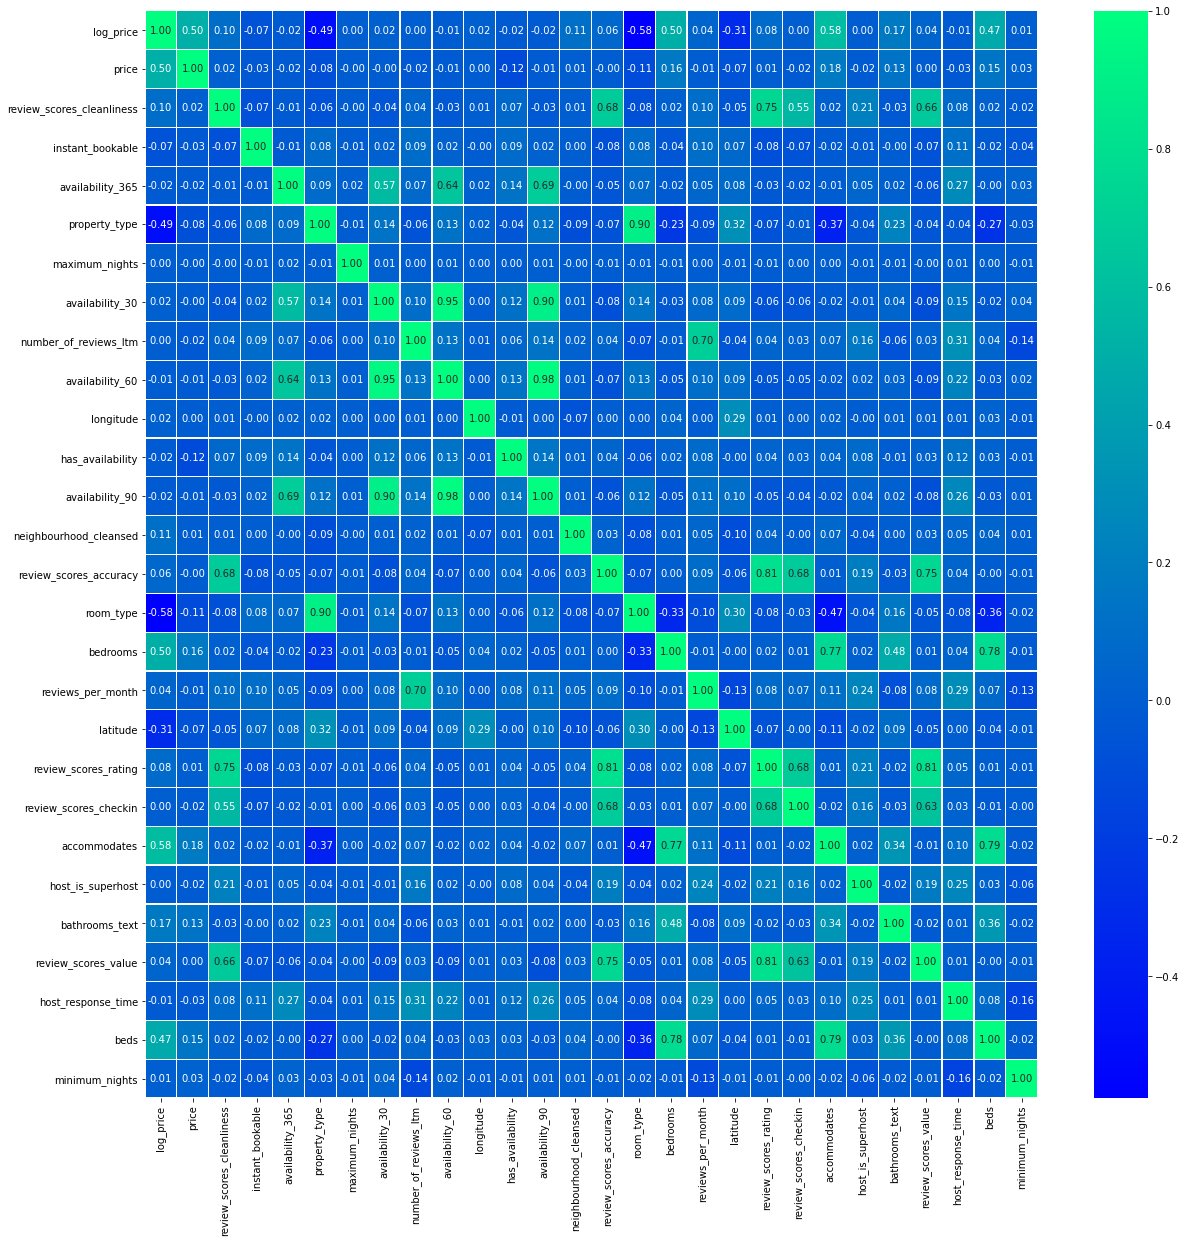

In [5]:
# Plotting the correlation heatmap
dfcorr = df.corr()
fig,ax = plt.subplots(figsize = (20,20))
ax = sns.heatmap(dfcorr, annot= True,fmt = '.2f', lw = 0.2, cmap = 'winter')

It is evident from the correlation heat map that number of person accomodated in the listing, beds and bedrooms in the listings have significant effect on the price of the listing. Number of batrooms and neighbourhood_cleansed are also contributing to pricing of the listings.

In [6]:
#Getting more details about the data
df.describe()

,log_price,price,review_scores_cleanliness,availability_365,property_type,maximum_nights,availability_30,number_of_reviews_ltm,availability_60,longitude,availability_90,neighbourhood_cleansed,review_scores_accuracy,room_type,bedrooms,reviews_per_month,latitude,review_scores_rating,review_scores_checkin,accommodates,bathrooms_text,review_scores_value,host_response_time,beds,minimum_nights
count,10799.000000,10799.000000,10799.000000,10799.000000,10799.000000,1.079900e+04,10799.000000,10799.000000,10799.000000,10799.000000,10799.000000,10799.000000,10799.000000,10799.000000,10799.000000,10799.000000,10799.000000,10799.000000,10799.00000,10799.000000,10799.000000,10799.000000,10799.000000,10799.000000,10799.000000
mean,4.587674,141.944717,9.405408,132.810723,17.392444,9.330885e+04,10.646171,3.877211,24.509399,-79.397907,39.674044,79.950273,9.622095,0.707288,1.423373,1.028144,43.681350,94.338828,9.74118,3.187795,3.817946,9.439115,2.328271,1.700806,25.862209
std,0.714854,384.407383,1.065511,137.310723,13.044437,9.622943e+06,12.638699,9.514493,25.644132,0.065645,38.524983,42.115366,0.917548,0.970663,0.798935,1.381917,0.048701,9.313683,0.79015,2.041321,2.655257,0.991150,1.410977,1.132960,37.597828
min,2.564949,13.000000,2.000000,0.000000,2.000000,1.000000e+00,0.000000,0.000000,0.000000,-79.622350,0.000000,0.000000,2.000000,0.000000,1.000000,0.010000,43.586490,20.000000,2.00000,1.000000,0.000000,2.000000,0.000000,0.000000,1.000000
25%,4.094345,60.000000,9.000000,0.000000,8.000000,9.000000e+01,0.000000,0.000000,0.000000,-79.427110,0.000000,42.000000,10.000000,0.000000,1.000000,0.170000,43.645135,93.000000,10.00000,2.000000,2.000000,9.000000,1.000000,1.000000,19.000000
50%,4.584967,98.000000,10.000000,89.000000,14.000000,1.125000e+03,1.000000,1.000000,11.000000,-79.397780,35.000000,87.000000,10.000000,0.000000,1.000000,0.500000,43.662960,97.000000,10.00000,2.000000,3.000000,10.000000,2.000000,1.000000,28.000000
75%,5.010635,150.000000,10.000000,261.000000,28.000000,1.125000e+03,27.000000,4.000000,56.000000,-79.375980,84.000000,122.000000,10.000000,2.000000,2.000000,1.290000,43.701375,100.000000,10.00000,4.000000,5.000000,10.000000,4.000000,2.000000,28.000000
max,9.472705,13000.000000,10.000000,365.000000,64.000000,1.000000e+09,30.000000,185.000000,60.000000,-79.126050,90.000000,139.000000,10.000000,3.000000,9.000000,13.540000,43.843760,100.000000,10.00000,16.000000,26.000000,10.000000,4.000000,13.000000,1125.000000


Mean price = 141.944717

Median price = 98.000000

Minimum price = 13.000000	

Maximum price = 13000.000000

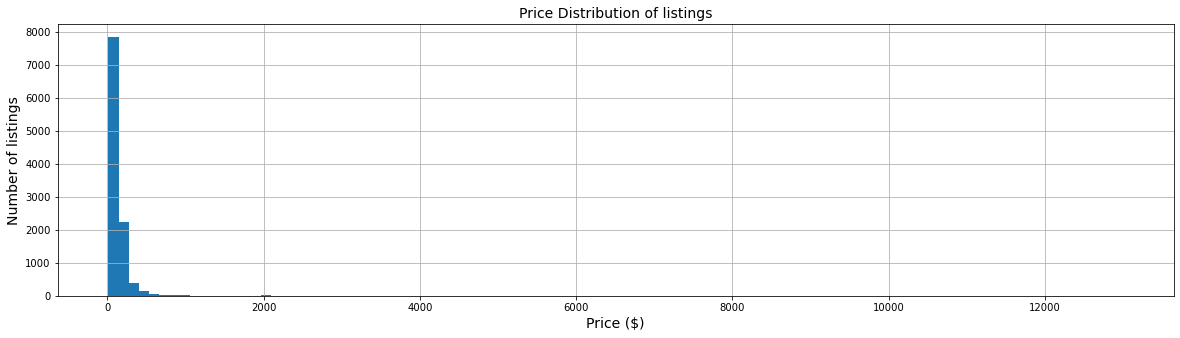

In [7]:
# Distribution of prices 
plt.figure(figsize=(20,5))
df.price.hist(bins=100)
plt.title("Price Distribution of listings", fontsize=14)
plt.xlabel("Price ($)", fontsize=14)
plt.ylabel("Number of listings", fontsize=14)
plt.show()

In [8]:
#Number of listings charging less than $50 
print(f"Number of listings charging less then $50 per night = {sum(df['price']<=50)}")

Number of listings charging less then $50 per night = 1978


In [9]:
#Number of listings charging less than or equal to $100 
print(f"Number of listings charging less then $50 per night = {sum(df['price']<=100)}")

Number of listings charging less then $50 per night = 5946


In [10]:
#Number of listings charging greater than $1000 
print(f"Number of listings charging less then $50 per night = {sum(df['price']>1000)}")

Number of listings charging less then $50 per night = 57


From above, it is clear that about 18% of the listings are priced below or equal to 50 dollars, more than 55% of the listings are priced below 100 dollars and only 57 listings are priced at 1000 dollar or more

As ther is a huge variation in the listing price. I want to check the relation of number of guest accomodating in a listing to price of the listings. 

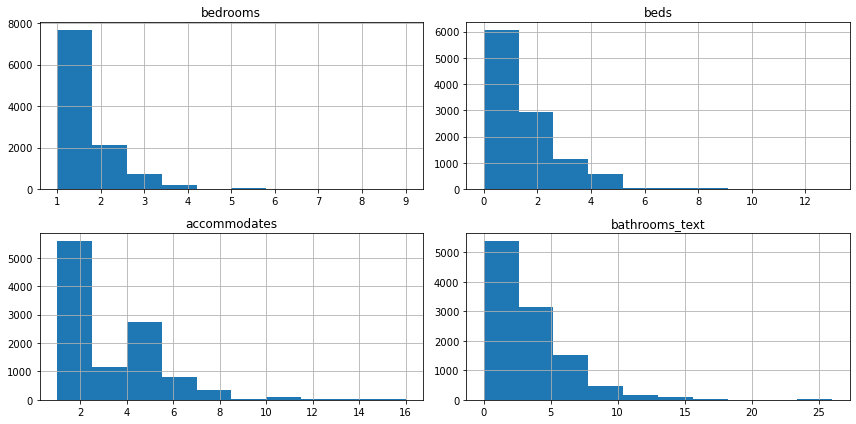

In [11]:
# Frequency distribution of bedrooms, beds, number of persons accomodated and bathrooms
df[['bedrooms','beds','accommodates', 'bathrooms_text']].hist(figsize=(12,6));
plt.tight_layout()

* About 70% of the listings have single bedrooms and 53% of the listings have single bed only.
* About 52% of the listings can accommodates 2 or less persons.
* About 50% of the listings have 2 bathroom availability

In [12]:
# Getting information about room type
df['room_type'].value_counts()

0    7017
2    3630
3     113
1      39
Name: room_type, dtype: int64

In [13]:
le = preprocessing.LabelEncoder()
le.classes_ = np.load('./LabelEncoder/room_type.npy', allow_pickle=True)
print(le.inverse_transform(range(0,len(df['room_type'].value_counts()))))

['Entire home/apt' 'Hotel room' 'Private room' 'Shared room']


From above, we can conclude that Entire home/apt are highest on the listings followed by private rooms. Hotel rooms as expected are least listings on Airbnb.

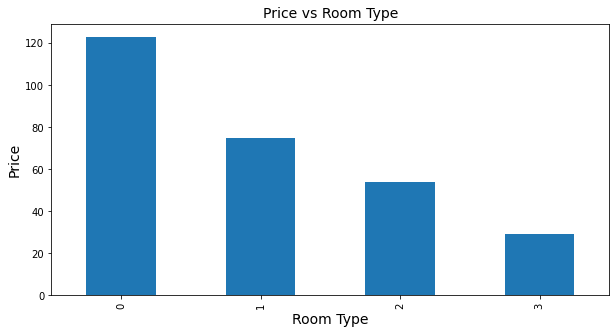

In [14]:
# Effect of room type on price
plt.figure(figsize=(10,5))
df.groupby('room_type')['price'].median().plot(kind='bar')
plt.title('Price vs Room Type', fontsize=14)
plt.xlabel('Room Type', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

The above plot shows that price are highest for listings with Entire home/apartment followed by Hotel room prices. As expected shared rooms have least prices.

### How price varies with  bedrooms,  beds, people accommodated  and bathrooms 

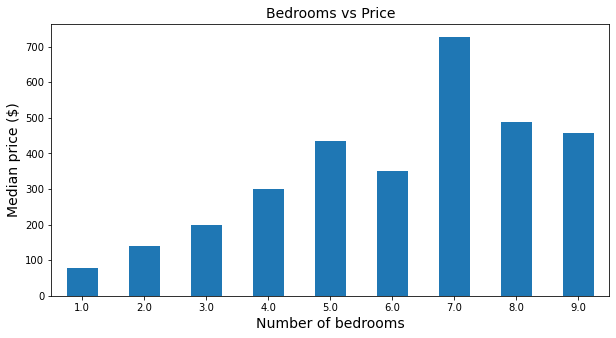

In [15]:
# Median price of Airbnbs as per number of bedrooms 
plt.figure(figsize=(10,5))
df.groupby('bedrooms')['price'].median().plot(kind='bar')
plt.title('Bedrooms vs Price', fontsize=14)
plt.xlabel('Number of bedrooms', fontsize=14)
plt.ylabel('Median price ($)', fontsize=14)
plt.xticks(rotation=0)
#plt.xlim(left=0.5)
plt.show()

In [37]:
df[df['bedrooms']==8]

,log_price,price,review_scores_cleanliness,instant_bookable,availability_365,property_type,maximum_nights,availability_30,number_of_reviews_ltm,availability_60,longitude,has_availability,availability_90,neighbourhood_cleansed,review_scores_accuracy,room_type,bedrooms,reviews_per_month,latitude,review_scores_rating,review_scores_checkin,accommodates,host_is_superhost,bathrooms_text,review_scores_value,host_response_time,beds,minimum_nights
826,6.171701,479.0,9.0,False,295,14,1125,29,0,59,-79.29245,True,89,35,10.0,0,8.0,0.20,43.68626,89.0,10.0,16,True,15,9.0,4,8.0,28
4178,6.212606,499.0,8.0,False,308,45,1125,0,3,29,-79.39404,True,52,62,8.0,0,8.0,1.87,43.65244,85.0,9.0,16,False,15,8.0,1,8.0,2
5239,5.700444,299.0,8.0,True,0,19,1125,0,0,0,-79.27622,True,0,0,7.0,0,8.0,0.19,43.81362,70.0,8.0,16,True,19,7.0,1,8.0,28
8445,6.639876,765.0,10.0,False,346,6,28,29,13,59,-79.31380,True,86,121,10.0,0,8.0,1.62,43.72999,99.0,10.0,5,True,20,10.0,4,12.0,28


In [17]:
le = preprocessing.LabelEncoder()
le.classes_ = np.load('./LabelEncoder/property_type.npy', allow_pickle=True)
print(le.inverse_transform(range(0,len(df['property_type'].value_counts()))))

['Barn' 'Boat' 'Camper/RV' 'Campsite' 'Earth house' 'Entire apartment'
 'Entire bungalow' 'Entire cabin' 'Entire condominium' 'Entire cottage'
 'Entire floor' 'Entire guest suite' 'Entire guesthouse' 'Entire home/apt'
 'Entire house' 'Entire loft' 'Entire place' 'Entire serviced apartment'
 'Entire townhouse' 'Entire villa' 'Private room'
 'Private room in apartment' 'Private room in barn'
 'Private room in bed and breakfast' 'Private room in bungalow'
 'Private room in casa particular' 'Private room in castle'
 'Private room in cave' 'Private room in condominium'
 'Private room in cottage' 'Private room in earth house'
 'Private room in farm stay' 'Private room in floor'
 'Private room in guest suite' 'Private room in guesthouse'
 'Private room in hostel' 'Private room in house' 'Private room in loft'
 'Private room in nature lodge' 'Private room in resort'
 'Private room in serviced apartment' 'Private room in tiny house'
 'Private room in townhouse' 'Private room in train'
 'Private

Price of the listings increases with availability of number of bedrooms

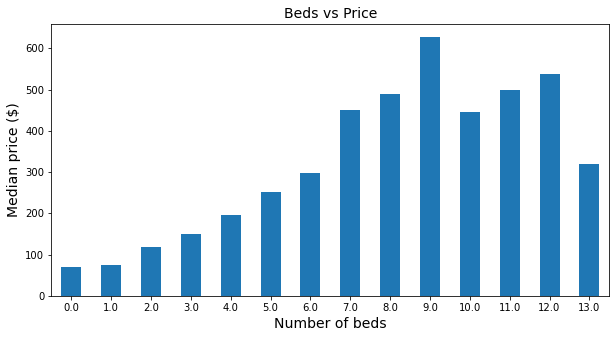

In [18]:
# Median price of Airbnbs as per number of beds in the listing
plt.figure(figsize=(10,5))
df.groupby('beds')['price'].median().plot(kind='bar')
plt.title('Beds vs Price', fontsize=14)
plt.xlabel('Number of beds', fontsize=14)
plt.ylabel('Median price ($)', fontsize=14)
plt.xticks(rotation=0)
#plt.xlim(left=0.5)
plt.show()

Price of the listings increases with availability of number of beds

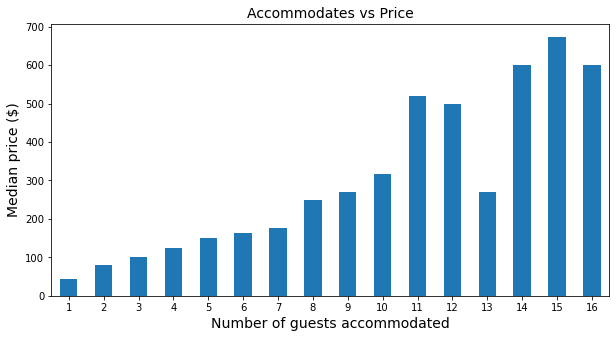

In [19]:
# Median price of Airbnbs accommodating different number of guests
plt.figure(figsize=(10,5))
df.groupby('accommodates')['price'].median().plot(kind='bar')
plt.title('Accommodates vs Price', fontsize=14)
plt.xlabel('Number of guests accommodated', fontsize=14)
plt.ylabel('Median price ($)', fontsize=14)
plt.xticks(rotation=0)
#plt.xlim(left=0.5)
plt.show()

It is understandable from the plot that price of the listings is strongly proportinal to the number of guests accomodated in the listing. It can be easily observed that the median price of listings drop drastically when number of guests accomodated are 13.

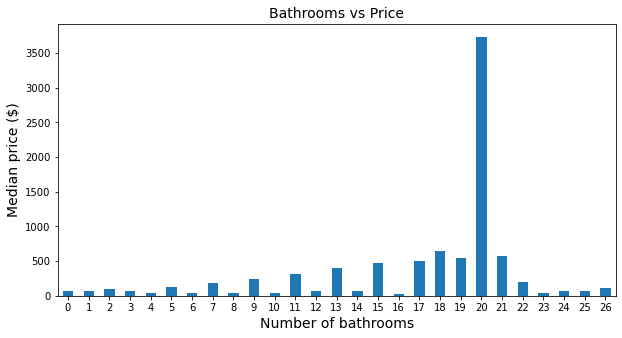

In [20]:
# Median price of Airbnbs as per number of bathrooms in the listing
plt.figure(figsize=(10,5))
df.groupby('bathrooms_text')['price'].median().plot(kind='bar')
plt.title('Bathrooms vs Price', fontsize=14)
plt.xlabel('Number of bathrooms', fontsize=14)
plt.ylabel('Median price ($)', fontsize=14)
plt.xticks(rotation=0)
#plt.xlim(left=0.5)
plt.show()

# checking the property types

It is clear that number of bathrooms availability does not impact the price of the listings as it can be observed that more number of bathrooms in the listings does not mean that listing will be priced highly. Some listings with very high bathrooms availability are priced higher because those listings may be are hotel rooms or Entire home/apartments.

### Bedrooms vs beds


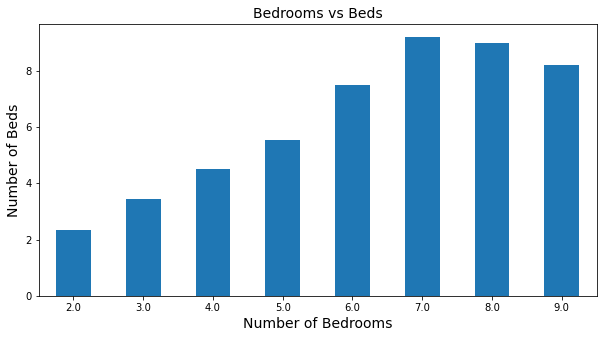

In [21]:
# Bedrooms vs Beds
plt.figure(figsize=(10,5))
df.groupby('bedrooms')['beds'].mean().plot(kind='bar')
plt.title('Bedrooms vs Beds', fontsize=14)
plt.xlabel('Number of Bedrooms', fontsize=14)
plt.ylabel('Number of Beds', fontsize=14)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

It is clear that with increase in bedrooms in the listings, the beds availabilty also increases.

### Bedrooms vs Bathrooms

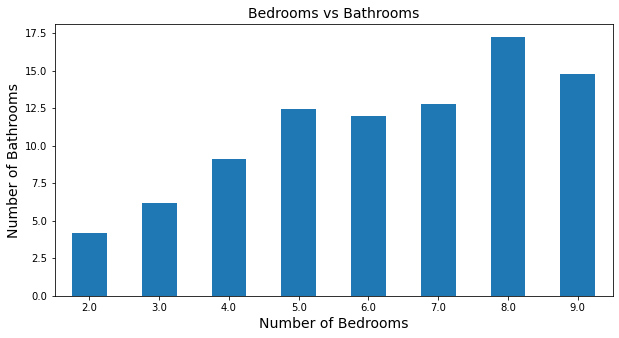

In [22]:
# Bedrooms vs Bathrooms
plt.figure(figsize=(10,5))
df.groupby('bedrooms')['bathrooms_text'].mean().plot(kind='bar')
plt.title('Bedrooms vs Bathrooms', fontsize=14)
plt.xlabel('Number of Bedrooms', fontsize=14)
plt.ylabel('Number of Bathrooms', fontsize=14)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

It is clear that with increase in bedrooms in the listings, the number of bathrooms availabilty also increases.

### Bedrooms vs Accommodates

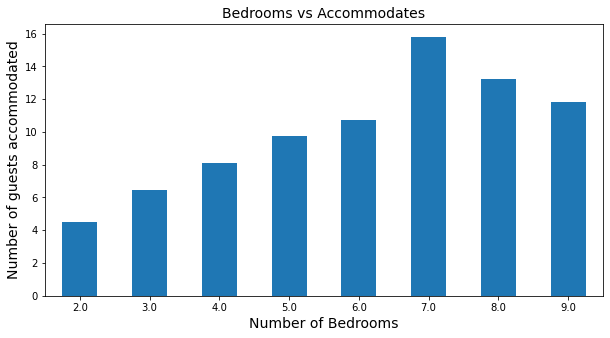

In [23]:
# Bedrooms vs Accommodates
plt.figure(figsize=(10,5))
df.groupby('bedrooms')['accommodates'].mean().plot(kind='bar')
plt.title('Bedrooms vs Accommodates', fontsize=14)
plt.xlabel('Number of Bedrooms', fontsize=14)
plt.ylabel('Number of guests accommodated', fontsize=14)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

Number of guests accomodated increses with increase in the availability of bedrooms but then decreses which might be in case for Entire home/apartment.

## Beds vs Accommodates¶

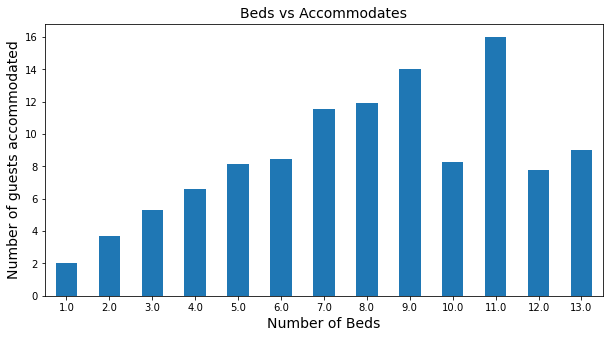

In [24]:
# Beds vs Accommodates
plt.figure(figsize=(10,5))
df.groupby('beds')['accommodates'].mean().plot(kind='bar')
plt.title('Beds vs Accommodates', fontsize=14)
plt.xlabel('Number of Beds', fontsize=14)
plt.ylabel('Number of guests accommodated', fontsize=14)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

Number of guests accomodated increses with increase in the availability of beds but sometimes decreases which might be in case for Entire home/apartment.

# Conclusion

* About 70% of the listings have single bedrooms and about 53% of the listings have single bed only.

* About 52% of the listings can accommodates 2 or less persons.

* About 50% of the listings have 2 bathroom availability

* About 18% of the listings are priced below or equal to 50 dollars, more than 55% of the listings are priced below 
  100 dollars and only 57 listings are priced at 1000 dollar or more.

* Most of the listings Entire home/apt are highest on the listings followed by private rooms. Hotel rooms as expected 
  are least listings on Airbnb.

* Listing prices are affected by type of listings.
     * Prices are highest for Entire home/apt followed by hotel rooms price and private rooms. As expected, shared
       room are least priced.

* Listing prices are affected by number of person accomodated in the listing, bedrooms, beds and bathrooms    
  availability.
  
 